In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(1)

In [3]:
x = np.expand_dims(np.arange(-1.5, 1.5, 0.01),1) 
print(x.shape)
y = np.sinc(5*x)
print(y.shape)

(300, 1)
(300, 1)


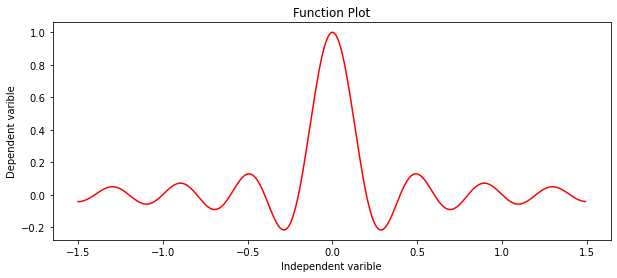

In [4]:
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "red")
plt.title('Function Plot')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()

In [19]:
m1 =    torch.nn.Sequential(
        torch.nn.Linear(1, 5),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(5, 10),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(10, 10),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(10, 10),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(10, 10),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(10, 10),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(10, 5),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(5, 1),
    )

optimizer = torch.optim.RMSprop(m1.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # mean squared loss

In [20]:
def model_train(model,x,y):
    max_epoch = 20000
    epoch_arr,loss_arr=[],[]
    not_converged = True
    epoch = 0
    while not_converged:
        epoch += 1
        prediction = model(x)  
        loss = loss_func(prediction, y)
        optimizer.zero_grad() #clear gradients for next epoch
        loss.backward() #compute gradients using back propogation
        optimizer.step() 
        epoch_arr.append(epoch)
        loss_arr.append(loss.detach().numpy())
        
        if epoch % 50 == 0: 
            print(f'epoch: {epoch}, loss = {loss.item():.4f}')
                
        if epoch == max_epoch:
                print("Max Epoch Reached")
                not_converged = False

        elif (epoch > 5) and  (loss_arr[-1] < 0.001):
            if abs(loss_arr[-3] - loss_arr[-2]) < 1.0e-05 and abs(loss_arr[-2] - loss_arr[-1]) < 1.0e-05:
                print("Convergence reached for loss:",loss_arr[-1])
                not_converged = False
                
    return epoch_arr,loss_arr,prediction

In [21]:
m1_epoch_arr, m1_loss_arr, m1_prediction = model_train(m1, x, y)

epoch: 50, loss = 0.0968
epoch: 100, loss = 0.0780
epoch: 150, loss = 0.0616
epoch: 200, loss = 0.0608
epoch: 250, loss = 0.0576
epoch: 300, loss = 0.0366
epoch: 350, loss = 0.0061
epoch: 400, loss = 0.0058
epoch: 450, loss = 0.0053
epoch: 500, loss = 0.0048
epoch: 550, loss = 0.0046
epoch: 600, loss = 0.0046
epoch: 650, loss = 0.0045
epoch: 700, loss = 0.0043
epoch: 750, loss = 0.0041
epoch: 800, loss = 0.0039
epoch: 850, loss = 0.0037
epoch: 900, loss = 0.0035
epoch: 950, loss = 0.0033
epoch: 1000, loss = 0.0032
epoch: 1050, loss = 0.0029
epoch: 1100, loss = 0.0028
epoch: 1150, loss = 0.0026
epoch: 1200, loss = 0.0026
epoch: 1250, loss = 0.0025
epoch: 1300, loss = 0.0024
epoch: 1350, loss = 0.0024
epoch: 1400, loss = 0.0024
epoch: 1450, loss = 0.0024
epoch: 1500, loss = 0.0023
epoch: 1550, loss = 0.0023
epoch: 1600, loss = 0.0024
epoch: 1650, loss = 0.0025
epoch: 1700, loss = 0.0024
epoch: 1750, loss = 0.0023
epoch: 1800, loss = 0.0023
epoch: 1850, loss = 0.0024
epoch: 1900, loss = 0

In [22]:
m2 =    torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(10, 18),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(18, 15),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(15, 4),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(4, 1),
    )
    
optimizer = torch.optim.RMSprop(m2.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss() 

In [23]:
m2_epoch_arr, m2_loss_arr, m2_prediction = model_train(m2, x, y)

epoch: 50, loss = 0.0444
epoch: 100, loss = 0.0314
epoch: 150, loss = 0.0184
epoch: 200, loss = 0.0099
epoch: 250, loss = 0.0069
epoch: 300, loss = 0.0051
epoch: 350, loss = 0.0043
epoch: 400, loss = 0.0039
epoch: 450, loss = 0.0038
epoch: 500, loss = 0.0037
epoch: 550, loss = 0.0033
epoch: 600, loss = 0.0031
epoch: 650, loss = 0.0030
epoch: 700, loss = 0.0029
epoch: 750, loss = 0.0027
epoch: 800, loss = 0.0027
epoch: 850, loss = 0.0027
epoch: 900, loss = 0.0026
epoch: 950, loss = 0.0025
epoch: 1000, loss = 0.0024
epoch: 1050, loss = 0.0025
epoch: 1100, loss = 0.0025
epoch: 1150, loss = 0.0023
epoch: 1200, loss = 0.0022
epoch: 1250, loss = 0.0022
epoch: 1300, loss = 0.0023
epoch: 1350, loss = 0.0025
epoch: 1400, loss = 0.0026
epoch: 1450, loss = 0.0024
epoch: 1500, loss = 0.0022
epoch: 1550, loss = 0.0021
epoch: 1600, loss = 0.0021
epoch: 1650, loss = 0.0022
epoch: 1700, loss = 0.0023
epoch: 1750, loss = 0.0023
epoch: 1800, loss = 0.0022
epoch: 1850, loss = 0.0022
epoch: 1900, loss = 0

In [24]:
m3 =    torch.nn.Sequential(
        torch.nn.Linear(1, 190),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(190, 1),
    )
optimizer = torch.optim.RMSprop(m3.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

In [25]:
m3_epoch_arr, m3_loss_arr, m3_prediction = model_train(m3, x, y)

epoch: 50, loss = 0.0501
epoch: 100, loss = 0.0573
epoch: 150, loss = 0.0408
epoch: 200, loss = 0.0379
epoch: 250, loss = 0.0358
epoch: 300, loss = 0.0342
epoch: 350, loss = 0.0333
epoch: 400, loss = 0.0329
epoch: 450, loss = 0.0325
epoch: 500, loss = 0.0309
epoch: 550, loss = 0.0292
epoch: 600, loss = 0.0279
epoch: 650, loss = 0.0271
epoch: 700, loss = 0.0265
epoch: 750, loss = 0.0260
epoch: 800, loss = 0.0252
epoch: 850, loss = 0.0243
epoch: 900, loss = 0.0235
epoch: 950, loss = 0.0228
epoch: 1000, loss = 0.0222
epoch: 1050, loss = 0.0217
epoch: 1100, loss = 0.0211
epoch: 1150, loss = 0.0205
epoch: 1200, loss = 0.0200
epoch: 1250, loss = 0.0195
epoch: 1300, loss = 0.0190
epoch: 1350, loss = 0.0186
epoch: 1400, loss = 0.0182
epoch: 1450, loss = 0.0177
epoch: 1500, loss = 0.0173
epoch: 1550, loss = 0.0168
epoch: 1600, loss = 0.0164
epoch: 1650, loss = 0.0161
epoch: 1700, loss = 0.0157
epoch: 1750, loss = 0.0154
epoch: 1800, loss = 0.0151
epoch: 1850, loss = 0.0147
epoch: 1900, loss = 0

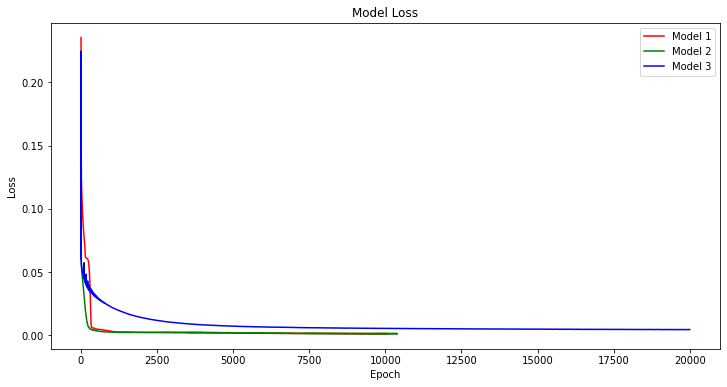

In [26]:
plt.figure(figsize=(12,6))
plt.plot(m1_epoch_arr, m1_loss_arr, color = "r")
plt.plot(m2_epoch_arr, m2_loss_arr, color = "g")
plt.plot(m3_epoch_arr, m3_loss_arr, color = "b")
plt.title('Model Loss')
plt.legend(['Model 1', 'Model 2','Model 3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

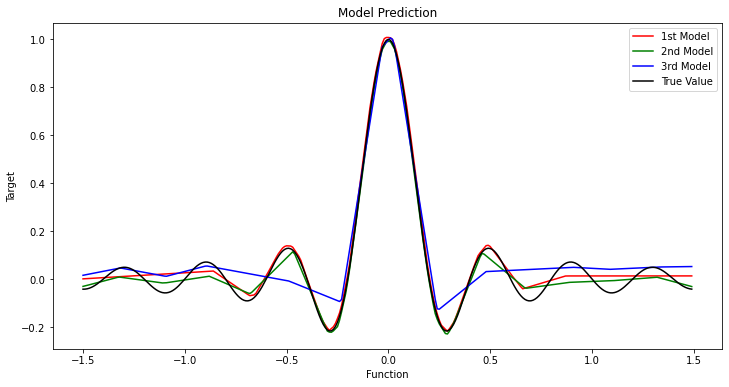

In [27]:
plt.figure(figsize=(12,6))
plt.plot(x, m1_prediction.data, color="r", label = '1st Model')
plt.plot(x, m2_prediction.data, color="g", label = '2nd Model')
plt.plot(x, m3_prediction.data, color="b", label = '3rd Model')
plt.plot(x, y, color="black", label = 'True Value')
plt.title('Model Prediction')
plt.xlabel('Function')
plt.ylabel('Target')
plt.legend()
plt.show()